In [4]:
import pandas as pd

In [5]:
import numpy as np

In [50]:
import matplotlib.pyplot as plt

In [6]:
taxies = pd.read_csv("taxi_dataset_with_predictions.csv", index_col=0)

In [7]:
taxies

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance_km,prediction_1,prediction_2
id,,,,,,,,
id2875421,1,2016-03-14 17:24:55,930.399753,0,455.0,1.500479,578.156451,355.270710
id2377394,0,2016-06-12 00:43:35,930.399753,0,663.0,1.807119,962.657188,674.295781
id3858529,1,2016-01-19 11:35:24,930.399753,0,2124.0,6.392080,2546.180515,2422.132431
id3504673,1,2016-04-06 19:32:31,930.399753,0,429.0,1.487155,737.926214,795.992362
id2181028,1,2016-03-26 13:30:55,930.399753,0,435.0,1.189925,666.070794,-4.158492
...,...,...,...,...,...,...,...,...
id2376096,1,2016-04-08 13:31:04,1053.529749,0,778.0,1.226296,1090.926494,1230.540125
id1049543,0,2016-01-10 07:35:15,930.399753,0,655.0,6.056935,883.318745,1568.424070
id2304944,1,2016-04-22 06:57:41,930.399753,0,764.0,7.832952,1002.554003,780.697509


Посчитаем **MSE** для обеих моделей: 

$$
MSE = \frac{1}{n} \sum_i^n (a(x_i)-y_i)^2
$$

In [8]:
mse_1 = ((taxies['prediction_1'] - taxies['trip_duration']) ** 2).mean()

In [9]:
mse_2 = ((taxies['prediction_2'] - taxies['trip_duration']) ** 2).mean()

In [10]:
print(int(mse_1), int(mse_2))

99994 124936


Видим, что **MSE** имеет достаточно большой порядок.

Посчитаем значение **RMSE** для обеих моделей:

$$
RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_i^n (a(x_i)-y_i)^2}
$$

In [11]:
rmse_1 = ((taxies['prediction_1'] - taxies['trip_duration']) ** 2).mean() ** (1/2)

In [12]:
rmse_2 = ((taxies['prediction_2'] - taxies['trip_duration']) ** 2).mean() ** (1/2)

In [13]:
print(int(rmse_1), int(rmse_2))

316 353


Посчитаем значение **MAE** для обеих моделей:

$$
MAE = \frac{1}{n} \sum_i^n |a(x_i)-y_i|
$$

In [14]:
mae_1 = (np.abs(taxies['prediction_1'] - taxies['trip_duration'])).mean()

In [15]:
mae_2 = (np.abs(taxies['prediction_2'] - taxies['trip_duration'])).mean()

In [16]:
print(int(mae_1), int(mae_2))

300 281


Непонятно, какая модель лучше.

Давайте убедимся в том, что фатальных ошибок у второй модели больше.

Посчитаем количество случаев, когда предсказания отклоняются от ответа более чем на 500 от правильного ответа для обоих моделей.

In [17]:
counter_1 = (np.abs(taxies['prediction_1'] - taxies['trip_duration']) >= 500).sum()

In [18]:
counter_2 = (np.abs(taxies['prediction_2'] - taxies['trip_duration']) >= 500).sum()

Построим диаграмму рассеивания.

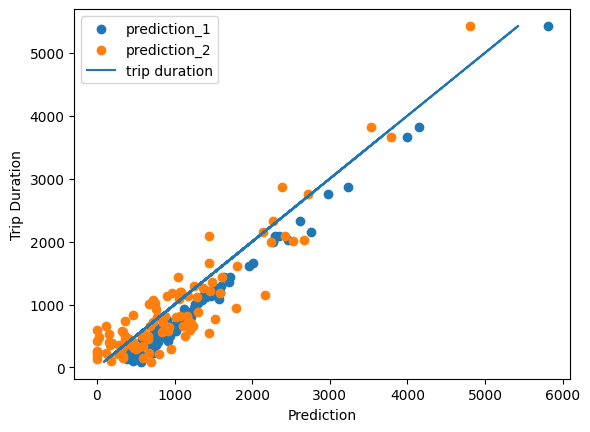

In [56]:
n = int(taxies.shape[0]/100)
idx = np.arange(0, taxies.shape[0], n)
taxies_sub = taxies.iloc[idx]

plt.scatter(taxies_sub['prediction_1'], taxies_sub['trip_duration'], label="prediction_1")
plt.scatter(taxies_sub['prediction_2'], taxies_sub['trip_duration'], label="prediction_2")
plt.plot(taxies_sub['trip_duration'], taxies_sub['trip_duration'], label="trip duration")
plt.legend()
plt.xlabel('Prediction')
plt.ylabel('Trip Duration')
plt.show()

In [19]:
print(counter_1, counter_2)

33061 228789


**Несимметричные метрики**

Зачастую, чтобы выбрать среди всего многообразия моделей, мы можем использовать несимметричные метрики такие, как **RMSLE**.

**MSE** и **MAE** относятся к симметричным. Они одинаково наказывают модель как за перепредсказание, так и за недопредсказание. Ошибки +2 и -2 переводятся **MSE** и **MAE** в одинаковую меру: 4 в первом случае и 2 во втором.



В действительности же, можно придумать целый ряд задач, когда лучше выбирать несимметричную метрики.

Представьте, что мы - дистрибьютор инсулина, и нам нужно построить модель, которая оптимизирует поставки. В таком случае кажется, что поставить лекарства на 2 единицы больше и на 2 единицы меньше - совершенно разные сценарии и разная интерпретация катастрофичности ошибки.

В первом случае мы можем потерять немного прибыли, а во втором - лишить пациента жизненно важного лекарства. Поэтому хотелось бы научиться еще и по-разному оценивать недо- и перепредсказания. Для этого и используют несимметричные метрики. Рассчитаем **RMSLE**:

$$
\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}
$$


Очевидно, что для некоторых отрицательных предсказаний, формула не будет работать, так как логарифм от отрицательных значений взять нельзя. Поэтому давайте подкорректируем наши прогнозы: все отрицательные числа переведем в нули (лучше уж в нашей задаче предсказать ноль секунд, чем минус 100 секунд)

In [21]:
taxies.loc[(taxies['prediction_1'] < 0), 'prediction_1'] = 0
taxies.loc[(taxies['prediction_2'] < 0), 'prediction_2'] = 0

In [29]:
# Проверим, что отрицательных значений нет
taxies['prediction_1'][(taxies['prediction_1'] < 0)].count() + taxies['prediction_2'][(taxies['prediction_2'] < 0)].count()

0

In [33]:
rmsle_1 = round(((np.log(taxies['trip_duration'] + 1) - np.log(taxies['prediction_1'] + 1)) ** 2).mean() ** (1 / 2), 3)

In [34]:
rmsle_2 = round(((np.log(taxies['trip_duration'] + 1) - np.log(taxies['prediction_2'] + 1)) ** 2).mean() ** (1 / 2), 3)

In [47]:
print(f"RMSLE для первой модели: {rmsle_1}, RMSLE для второй модели: {rmsle_2}.")

RMSLE для первой модели: 0.554, RMSLE для второй модели: 1.556.


Посчитайте, для какого количества объектов первая модель сделала перепредсказания и недопредсказания.

In [38]:
over_predicted_1 = ((taxies['prediction_1'] - taxies['trip_duration']) > 0).sum()

In [39]:
under_predicted_1 = ((taxies['prediction_1'] - taxies['trip_duration']) < 0).sum()

In [40]:
print(over_predicted_1, under_predicted_1)

1456721 1923


Посчитайте, для какого количества объектов вторая модель сделала перепредсказания и недопредсказания.

In [42]:
over_predicted_2 = ((taxies['prediction_2'] - taxies['trip_duration']) > 0).sum()

In [43]:
under_predicted_2 = ((taxies['prediction_2'] - taxies['trip_duration']) < 0).sum()

In [44]:
print(over_predicted_2, under_predicted_2)

811778 646866


Таким образом, **RMSLE** скорее выберет модель, которая перепредсказывает таргет, чем недопредсказывает. Поэтому для оператора такси, который хочет оптимизировать поездки таксистов и более аккуратно мэтчить их с клиентами, использовать **RMSLE** – хорошая идея.